# Linear SVM:     
Used when the data is linearly separable, meaning a straight line (in 2D) or hyperplane can perfectly separate the classes.



### Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Read & Load the Data

In [2]:
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.shape

(10, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
feature = df.iloc[:, 1:2]
target = df.iloc[:, 2]

In [8]:
target=np.array(target).reshape(-1,1)

In [9]:
feature

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [10]:
target

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

### Split the data

In [11]:
X_train, X_test, y_train, y_test = train_test_split( feature, target, test_size = 0.2, random_state = 0)

In [12]:
X_train

,Level
4,5
9,10
1,2
6,7
7,8
3,4
0,1
5,6


### Feature Scaling

In [13]:
# scaling features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [15]:
model_svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
model_svr_rbf.fit(X_train, y_train)

E:\New folder\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [16]:
y_pred = model_svr_rbf.predict(X_test)

In [17]:
y_pred

array([-0.56744557,  1.39286803])

In [19]:
# Predicting a new result
eg_pred = model_svr_rbf.predict([[6.5]])
eg_pred

array([4.76739049])

### Visualizing the results

E:\New folder\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


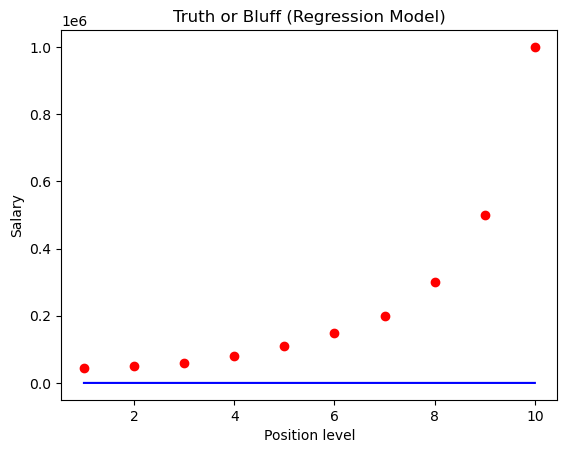

In [20]:
# Visualising the Regression results
plt.scatter(feature, target, color = 'red')
plt.plot(feature, model_svr_rbf.predict(feature), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()